In [1]:
import requests
from bs4 import BeautifulSoup

In [3]:
url = "https://www.bbc.com/news/articles/cx2ppgg0zvlo"

In [4]:
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [5]:
headlines = [tag.get_text(strip=True) for tag in soup.find_all('h2') if tag.get_text(strip=True)]

In [6]:
paragraphs = [tag.get_text(strip=True) for tag in soup.find_all('p') if tag.get_text(strip=True)]  

In [8]:
print("Headlines:")
for headline in headlines:
    print(headline)

Headlines:
What are these chips - and why do they matter?
How unusual is the deal with Nvidia and AMD?
What about national security concerns?
Who wins with this deal?
Intel shares jump as Softbank to buy $2bn stake in chip giant
Nvidia and AMD to pay 15% of China chip sales to US
China attacks latest US chip restrictions
US in talks over 10% Intel stake, White House confirms
Trump calls for Intel boss to resign immediately, alleging China ties
What are semiconductors and why is Trump threatening 100% tariffs?
Chinese nationals charged with exporting Nvidia AI chips to China
Tech manufacturing has powered Asia - now it's a casualty of Trump's tariffs


In [10]:
print("paragraphs:")
for paragraph in paragraphs:
    print(paragraph)

paragraphs:
Unusual. Quid pro quo. Unprecedented.
That is some of the reaction to news that two of the world's tech giantswill pay the US government 15% of their revenuefrom selling certain advanced chips to China. Industry watchers, former government advisers, policy makers and trade experts have been giving their views on the deal.
The news comes mere months after the Trump administration banned the sale of these chips to China, citing national security concerns.
That ban was lifted in mid-July. And now it seems the US government will go a step further - becoming a part of these American firms' business with China.
And critics argue that is both confusing and worrying.
These advanced chips are largely used for artificial intelligence (AI) applications at a time when investors are betting that AI will transform the global economy.
Last month, Nvidia - which is the world's leading chip firm - became the first company ever to hit $4tn (£3tn) in market value.
Nvidia developed the H20 chi

In [11]:
article = ' '.join(paragraphs)
print("Article content:")
print(article[:500])  # Print the first 500 characters of the article

Article content:
Unusual. Quid pro quo. Unprecedented. That is some of the reaction to news that two of the world's tech giantswill pay the US government 15% of their revenuefrom selling certain advanced chips to China. Industry watchers, former government advisers, policy makers and trade experts have been giving their views on the deal. The news comes mere months after the Trump administration banned the sale of these chips to China, citing national security concerns. That ban was lifted in mid-July. And now i


In [13]:
import re

In [14]:
#remove all non-alphanumeric characters except spaces
cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', article)
cleaned_text = cleaned_text.lower()  # Convert to lowercase
print("Cleaned text:")
print(cleaned_text[:500])  # Print the first 500 characters of the cleaned text

Cleaned text:
unusual quid pro quo unprecedented that is some of the reaction to news that two of the worlds tech giantswill pay the us government 15 of their revenuefrom selling certain advanced chips to china industry watchers former government advisers policy makers and trade experts have been giving their views on the deal the news comes mere months after the trump administration banned the sale of these chips to china citing national security concerns that ban was lifted in midjuly and now it seems the u


In [15]:
import nltk
from nltk.tokenize import word_tokenize
tokens = word_tokenize(cleaned_text)

In [16]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

print(f"Filtered tokens (without stopwords): {filtered_tokens[:50]}")  # Print the first 50 filtered tokens

Filtered tokens (without stopwords): ['unusual', 'quid', 'pro', 'quo', 'unprecedented', 'reaction', 'news', 'two', 'worlds', 'tech', 'giantswill', 'pay', 'us', 'government', '15', 'revenuefrom', 'selling', 'certain', 'advanced', 'chips', 'china', 'industry', 'watchers', 'former', 'government', 'advisers', 'policy', 'makers', 'trade', 'experts', 'giving', 'views', 'deal', 'news', 'comes', 'mere', 'months', 'trump', 'administration', 'banned', 'sale', 'chips', 'china', 'citing', 'national', 'security', 'concerns', 'ban', 'lifted', 'midjuly']


In [17]:
import spacy

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Convert list of tokens into a single string
text = " ".join(filtered_tokens)

# Process with spaCy
doc = nlp(text)

# Lemmatize
lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

print(lemmatized_tokens[:50])  # preview first 50


['unusual', 'quid', 'pro', 'quo', 'unprecedented', 'reaction', 'news', 'world', 'tech', 'giantswill', 'pay', 'government', 'revenuefrom', 'sell', 'certain', 'advanced', 'chip', 'china', 'industry', 'watcher', 'government', 'adviser', 'policy', 'maker', 'trade', 'expert', 'give', 'view', 'deal', 'news', 'come', 'mere', 'month', 'trump', 'administration', 'ban', 'sale', 'chip', 'china', 'cite', 'national', 'security', 'concern', 'ban', 'lift', 'midjuly', 'government', 'step', 'american', 'firm']


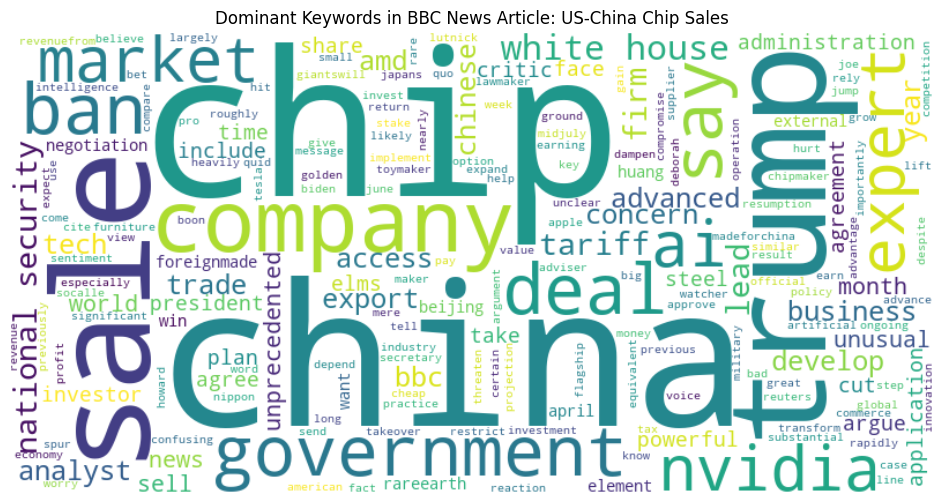

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join tokens back into a string
final_text = " ".join(lemmatized_tokens)

# Generate wordcloud
wordcloud = WordCloud(width=800, height=400,
                      background_color="white",
                      colormap="viridis").generate(final_text)

# Plot
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Dominant Keywords in BBC News Article: US-China Chip Sales")
plt.show()


In [20]:
wordcloud.to_file("wordcloud.png")